## First run this code to add some style to your notebook

In [1]:
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = os.getcwd()
    styles = "<style>\n%s\n</style>" % (open(os.path.join(base,'files/custom.css'),'r').read())
    return HTML(styles)
css_styling()

# 2 Calculating molecules with Pyquante!
![fake pyquante](files/PyQuante.jpg)
From [pyquante's website](http://pyquante.sourceforge.net/):
>PyQuante is an open-source suite of programs for developing quantum chemistry methods.
> The goal of this software is not necessarily to provide a working quantum chemistry program
>, but rather to provide a well-engineered set of tools so that scientists can construct 
> their own quantum chemistry programs without going through the tedium of having to write 
> every low-level routine.


For this part we'll perform some calculations on one molecule: ** Hydrogen Flouride (HF)** and then compare with other methods.

### First load some modules
Don't worry if you get a warning message about ERI's

In [2]:
# Numpy import
import numpy as np 
# PyQuante!
from PyQuante.Molecule import Molecule
# methods
from PyQuante import SCF
from PyQuante.MP import MP2

#plotting
import matplotlib.pyplot as plt
# make plots inline
%matplotlib inline

### Molecular Visualization utility function
Just run it

In [9]:
from PyQuante.Constants import ang2bohr
import imolecule

def visualize_Mol(molecule):
    mol = molecule.copy()
    # convert angstrom to bohr
    for atom in mol:
        coords=[a/ ang2bohr for a in atom.pos()]
        atom.update_coords(coords)
    # create as xyz string
    xyz_str = mol.as_string()
    return imolecule.draw(xyz_str,format='xyz',shader="phong")

## Part 1: Hydrogen Flouride!

![](http://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Hydrogen-fluoride-3D-balls.png/320px-Hydrogen-fluoride-3D-balls.png)

**Goals:**
* Find equilibrium geometry by varying bond distance
* Compare geometry with various levels of theory PM3, HF, DFT.


#### Equilibrium Geometry 
Since this is a two-atom molecule we only need to vary the coordinates of the molecules' nuclei by changing bond distances and see how the energy of the ground state (obtained via a Hartree-Fock calculation) changes with geometry.  We'll compare some of our first-principle estimates with experimental values (e.g. equilibrium bond distances).  

### Defining a Molecule
Recall that to create a molecule object you have to do something like:
```python
my_mol = Molecule('MyMolName', atomlist = [atom1, atom2], units = 'Angstroms')
```
Where atom1 and atom2 are of the form:
```python
atom1 = (#, (x, y, z))
```

Where # is the atomic number, and (x,y,z) are the coordinates. 

In [10]:
atom_H = (1,(0,0,0))
atom_F = (9,(1,0,0))
molecule = Molecule('HF', atomlist = [atom_H,atom_F], units = 'Angstroms')
molecule


Molecule: HF
	Atom ID: 0 Atomic Num:  1 ( 0.000, 0.000, 0.000)
	Atom ID: 1 Atomic Num:  9 ( 1.890, 0.000, 0.000)

### 3D representation

You can use your mouse to rotate and zoom in!

In [11]:
visualize_Mol(molecule)

### Exercise: Write a function that returns a Pyquante molecule representing Hydrogen Fluoride (HF) given a bond length

**Input**: a bond distance $r_0$

**Ouput**: Pyquante molecule

Write the function below 


In [12]:
def HF_geometry(r0):
    '''r0 is bond length
    Refere to diagram above for atom nomenclature
    '''
    ############# Two lines #############################
    #Create an atom called H and an atom called F.  Use the PyQuante format mentioned above. 
    #Set the H atom at the origin.  And set the F atom at position (r0, 0, 0)

    atom_H = (1, (0,0,0))
    atom_F = (9, (r0,0,0))
    
    ###################################################
    
    #######ONE LINE#########
    #Generate PyQuante Molecule caled molecule, with the atomlist [H,F] and units of Angstroms
    
    molecule = Molecule('HF', atomlist = [atom_H,atom_F], units = 'Angstroms')
    
    ##########################################################
    return molecule

### Get experimental bond distance
Go to [wikipedia](https://www.wikipedia.org), [cccdbd](http://cccbdb.nist.gov/) or wherever you want, and find the value for the bond distance of Hydrogen Fluoride.  Call that value **r0**. And then use the function above to create a PyQuante molecule called HF (for Hydrogen Fluoride, not for Hartree Fock) with that bond distance. 

In [13]:
######################Two lines########

r0 = 0.917

HF = HF_geometry(r0)

#######################

Now use the function to visualize the two nuclei. 

In [14]:
#######ONE LINE##########
visualize_Mol(HF)

### Get the energy for a single bond distance

We are going to use PyQuante to call the **Restricted Open Shell Hartree-Fock Method**. I'll show you how this is done for a single bond distance, what is normally called a **single point calculation**. 

This is done in two lines of code:
1. **SCF function**, which defines how we will solve the electronic structure. **SCF** stands for self consisten field.
2. **iterate()**, which procceds to solve the problem iteratively and sove the solutions in the variable.

In [15]:
solver = SCF(HF , method='ROHF')
solver.iterate()
print('The ground state energy is --> ', solver.energy)

('The ground state energy is --> ', -100.01134653537885)


#### We just did a calculation, so fast!
The calculation is a Hartree Fock methods, especifically Restricted Open Hartree Fock **(method=ROHF)** due to the charge and multiplicty of **HF**, along with default basis set (6-31G\*\*). This is the first line of attack when trying to solve the Schrödinger equation with wavefunctions.


Besides energy we can get other information:
* Orbital Energies (**orbe**), an array.
* Orbital Coeficients (**orbs**), an array of coefficents for each orbital.
* Number of occupied orbitals (**nclosed**), useful if you want to play with occupied/unoccupied.

Try it out! Write **solver.something** below:

In [17]:
solver.orbe

array([-26.2809261 ,  -1.58024552,  -0.74387177,  -0.62816829,
        -0.62816817,   0.21801137,   1.03287389,   1.32000059,
         1.48781294,   1.48781305,   1.70598276,   1.8956316 ,
         1.89563161,   2.15626335,   2.15626335,   2.85628672,
         3.04134211,   3.04134211,   4.01768946,   4.11993785])

### Get the ground state energy of Hydrogen Fluoride for a range of distances.

Now, based on the example I gave you above, you should be able to get the energy of Hydrogen Fluoride as a function of bond distance.  In the cell below: 

1.  Create an array with many distances (say from 0.3 to 2 in intervals of 0.05). (Hint: *np.arange(start,end,step_size)*)
2. Create an array of zeros, same length as your position array. (Hint: *np.zeros(shape)*)
3.  Write a for loop, where at each iteration you do the following:
    * Construct HF molecule with the apropriate bond distance 
    * Run a Hartree Fock calculation on that molecule, getting the energy, orbitals, and orbital energies
    * Store the energy for that bond distance in the energy array. 

** Note: ** Some calculations at close or large distances might not converge. No problem, just use as is.

In [26]:
############# about 7 - 9 lines #######

bondlength_array = np.arange(.25,2,.05)
energy_array = np.zeros(len(bondlength_array))
for i,bondlength in enumerate(bondlength_array): 
    HF = HF_geometry(bondlength)
    print("calculating...",bondlength)
    solver = SCF(HF ,method='ROHF')
    solver.iterate()
    energy_array[i] = solver.energy

print energy_array

('calculating...', 0.25)
('calculating...', 0.29999999999999999)
('calculating...', 0.34999999999999998)
('calculating...', 0.39999999999999997)
('calculating...', 0.44999999999999996)
('calculating...', 0.49999999999999994)
('calculating...', 0.54999999999999993)
('calculating...', 0.59999999999999987)
('calculating...', 0.64999999999999991)
('calculating...', 0.69999999999999996)
('calculating...', 0.74999999999999989)
('calculating...', 0.79999999999999982)
('calculating...', 0.84999999999999987)
('calculating...', 0.89999999999999991)
('calculating...', 0.94999999999999984)
('calculating...', 0.99999999999999978)
('calculating...', 1.0499999999999998)
('calculating...', 1.0999999999999999)
('calculating...', 1.1499999999999999)
('calculating...', 1.1999999999999997)
('calculating...', 1.2499999999999998)
('calculating...', 1.2999999999999998)
('calculating...', 1.3499999999999996)
('calculating...', 1.3999999999999997)
('calculating...', 1.4499999999999997)
('calculating...', 1.499


('calculating...', 1.5999999999999996)


('calculating...', 1.6499999999999997)


('calculating...', 1.6999999999999997)


('calculating...', 1.7499999999999996)


('calculating...', 1.7999999999999996)


('calculating...', 1.8499999999999996)


('calculating...', 1.8999999999999997)


('calculating...', 1.9499999999999997)


[ -94.14931597  -96.2043626   -97.5104686   -98.36316929  -98.92861814
  -99.30719278  -99.56186017  -99.732977    -99.84687507  -99.92109503
  -99.96757106  -99.99456736 -100.00790152 -100.01168708 -100.00885304
 -100.00146608  -99.99099919  -99.97849063  -99.96468593  -99.9501175
  -99.93518435  -99.92015081  -99.90521647  -99.89052216  -99.87615575
  -99.86217814  -99.84862589  -99.83545904  -99.82242268  -99.80794448
  -99.78047099  -99.67313615  -99.29153938  -98.90751796  -98.72136366]


### Plot the energy as a function of bond dinstance

Use matplotlib. As always, label your axes and add a title.

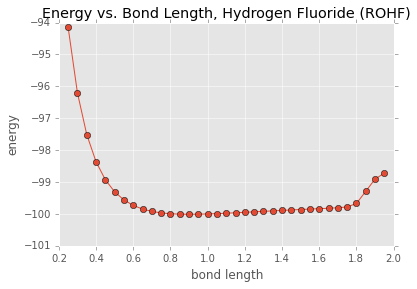

In [27]:
######HOWEVER MANY LINES YOU NEED TO MAKE THE PLOT######
plt.plot(bondlength_array, energy_array, '-o')
plt.xlabel('bond length')
plt.ylabel('energy')
plt.title('Energy vs. Bond Length, Hydrogen Fluoride (ROHF)')
plt.show()

## Questions
### For what bond distance do you get the minimum energy? 
### How does this compare to the bond distance in Wikipedia?

I recommend using the argmin function in numpy to get the **index** of the energy array corresponding to the minimal energy.  You can then use that index to recover the value of bond distance corresponding to this minimal energy. 

In [18]:
index = np.argmin(energy_array)
bondlength = bondlength_array[index]
energy = energy_array[index]
print( "Minimum energy is ",energy," at bond distance ",  bondlength)

NameError: name 'energy_array' is not defined

I get a minimum energy of -98.57 Hartree at a bond distance of .95 A.

This bond length is slightly longer than that from Wikipedia (.917 A).

## Part 2: Expanding to other Methods
There are other methods besides **ROHF** based on other theories of electronic structure.
Chosing a method is always a balance between computing speed and accuracy. 
Sometimes your molecule is very big and you need a cheap but less acurate method, or sometimes you need a lot of precision and have some computation time to spare.
For this we will try two other methods:
* **MINDO/3** (**method=MINDO3** option), a semi-empirical method, fast, cheap and dirty. Based on Hartree-Fock but makes a bunch of approximations and fits a bunch of parameters to experimental data.
* **DFT** as in Density Functional Theory (**method=dft** option), a ab-initio method that uses charge density to calculate properties. It has an extra parameter called functional, we will use the default one (SVWN).
* **MP2** as in moller plesset perturbation theory level 2 (**MP2** function). Based on a HF wavefuntion we perturb the solution to get a correction term that partially takes in to account the interactions between closed and open orbitals.

There are many details to account for when running a calculation, such as basis set or the choice of a functional (DFT), always be catious when making generalizations about methods.

### Single point energy calculations with DFT, MINDO3 and MP2
MINDO3 will only give us energy values

In [20]:
solver = SCF(HF, method='MINDO3')
solver.iterate()
print("Final MINDO3 energy for system HF is", solver.energy)

('Final MINDO3 energy for system HF is', -64.025180062317304)


In [21]:
solver = SCF(HF, method='DFT')
solver.iterate()
print("Final DFT energy for system HF is", solver.energy)

('Final DFT energy for system HF is', -50.676158982258357)


MP2 is a bit more elaborate since we first need a HF wavefunction as base for the perturbation

In [19]:
solver = SCF(HF,method="HF")
solver.iterate()
nclosed,nopen = HF.get_closedopen()
nbf = len(solver.basis_set.get())
emp2 = MP2(solver.ERI,solver.solver.orbs,solver.solver.orbe,nclosed,nbf-nclosed)
print("MP2 corrected enery for system HF is", solver.energy+emp2)

('MP2 corrected enery for system HF is', -100.19666601792879)


#### Exercise:
define a fucntion to calculate MP2 based on a PyQuante molecule

In [28]:
def MP2_energy(molecule):
    ############# about 5 - 7 lines #######
    solver = SCF(HF,method="HF")
    solver.iterate()
    nclosed,nopen = HF.get_closedopen()
    nbf = len(solver.basis_set.get())
    emp2 = MP2(solver.ERI,solver.solver.orbs,solver.solver.orbe,nclosed,nbf-nclosed)
    energy= solver.energy + emp2
    ######################################
    return energy

### Find Equilibrium Geometry with DFT, MINDO3 and MP2
### 1) First MINDO3!
#### Make another for-loop over bond-distances
You can copy the one we used with rohf.

In [25]:
############# about 7 - 9 lines #######

energy_array = np.zeros(len(bondlength_array))
for i,bondlength in enumerate(bondlength_array): 
    HF = HF_geometry(bondlength)
    print("calculating...",bondlength)
    solver = SCF(HF, method='MINDO3')
    solver.iterate()
    energy_array[i] = solver.energy

print energy_array

NameError: name 'bondlength_array' is not defined

#### Plot the bond length vs energy and printout the minimum bondlength

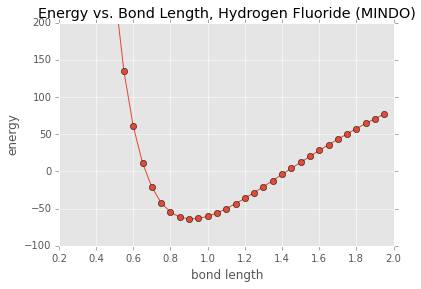

('Minimum energy is ', -63.944845240437644, ' at bond distance ', 0.89999999999999991)


In [127]:
######HOWEVER MANY LINES YOU NEED TO MAKE THE PLOT######
plt.plot(bondlength_array, energy_array, '-o')
plt.xlabel('bond length')
plt.ylabel('energy')
plt.title('Energy vs. Bond Length, Hydrogen Fluoride (MINDO)')
plt.ylim([-100,200])
plt.show()
index = np.argmin(energy_array)
bondlength = bondlength_array[index]
energy = energy_array[index]
print( "Minimum energy is ",energy," at bond distance ",  bondlength)

### 2)  Now DFT
#### Again, a For-loop over bond-distances
Might take a while!

In [129]:
############# about 7 - 9 lines #######

energy_array = np.zeros(len(bondlength_array))
for i,bondlength in enumerate(bondlength_array): 
    HF = HF_geometry(bondlength_array[i])
    print("calculating...",bondlength)
    solver = SCF(HF ,method='DFT')
    solver.iterate()
    energy_array[i] = solver.energy

print energy_array

('calculating...', 0.25)
('calculating...', 0.29999999999999999)
('calculating...', 0.34999999999999998)
('calculating...', 0.39999999999999997)
('calculating...', 0.44999999999999996)
('calculating...', 0.49999999999999994)
('calculating...', 0.54999999999999993)
('calculating...', 0.59999999999999987)
('calculating...', 0.64999999999999991)
('calculating...', 0.69999999999999996)
('calculating...', 0.74999999999999989)
('calculating...', 0.79999999999999982)
('calculating...', 0.84999999999999987)
('calculating...', 0.89999999999999991)
('calculating...', 0.94999999999999984)
('calculating...', 0.99999999999999978)
('calculating...', 1.0499999999999998)
('calculating...', 1.0999999999999999)
('calculating...', 1.1499999999999999)
('calculating...', 1.1999999999999997)
('calculating...', 1.2499999999999998)
('calculating...', 1.2999999999999998)
('calculating...', 1.3499999999999996)
('calculating...', 1.3999999999999997)
('calculating...', 1.4499999999999997)
('calculating...', 1.499

#### Plot the bond length vs energy and printout the minimum bondlength

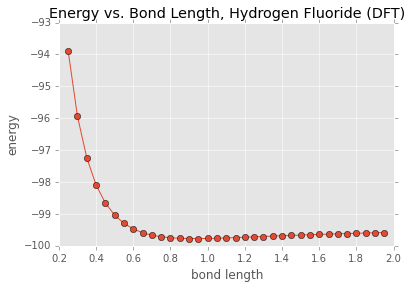

14 0.95 -99.7735595918
('Minimum energy is ', -99.77355959175442, ' at bond distance ', 0.94999999999999984)


In [130]:
######HOWEVER MANY LINES YOU NEED TO MAKE THE PLOT######
plt.plot(bondlength_array, energy_array, '-o')
plt.xlabel('bond length')
plt.ylabel('energy')
plt.title('Energy vs. Bond Length, Hydrogen Fluoride (DFT)')
plt.show()

index = np.argmin(energy_array)
bondlength = bondlength_array[index]
energy = energy_array[index]
print index, bondlength, energy
print( "Minimum energy is ",energy," at bond distance ",  bondlength)

### 2)  Now MP2
#### Again, a For-loop over bond-distances
Might take a while! Use your function

In [29]:
############# about 7 - 9 lines #######

energy_array = np.zeros(len(bondlength_array))
for i,bondlength in enumerate(bondlength_array): 
    HF = HF_geometry(bondlength_array[i])   
    print("calculating...",bondlength)
    energy_array[i] = MP2_energy(HF)

print energy_array

('calculating...', 0.25)
('calculating...', 0.29999999999999999)
('calculating...', 0.34999999999999998)
('calculating...', 0.39999999999999997)
('calculating...', 0.44999999999999996)
('calculating...', 0.49999999999999994)
('calculating...', 0.54999999999999993)
('calculating...', 0.59999999999999987)
('calculating...', 0.64999999999999991)
('calculating...', 0.69999999999999996)
('calculating...', 0.74999999999999989)
('calculating...', 0.79999999999999982)
('calculating...', 0.84999999999999987)
('calculating...', 0.89999999999999991)
('calculating...', 0.94999999999999984)
('calculating...', 0.99999999999999978)
('calculating...', 1.0499999999999998)
('calculating...', 1.0999999999999999)
('calculating...', 1.1499999999999999)
('calculating...', 1.1999999999999997)
('calculating...', 1.2499999999999998)
('calculating...', 1.2999999999999998)
('calculating...', 1.3499999999999996)
('calculating...', 1.3999999999999997)
('calculating...', 1.4499999999999997)
('calculating...', 1.499

#### Now plot your results

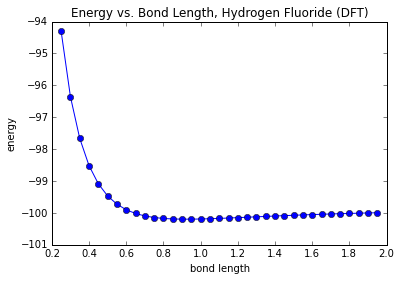

13 0.9 -100.196159087
('Minimum energy is ', -100.19615908736631, ' at bond distance ', 0.89999999999999991)


In [30]:
######HOWEVER MANY LINES YOU NEED TO MAKE THE PLOT######
plt.plot(bondlength_array, energy_array, '-o')
plt.xlabel('bond length')
plt.ylabel('energy')
plt.title('Energy vs. Bond Length, Hydrogen Fluoride (DFT)')
plt.show()

index = np.argmin(energy_array)
bondlength = bondlength_array[index]
energy = energy_array[index]
print index, bondlength, energy
print( "Minimum energy is ",energy," at bond distance ",  bondlength)

### Questions
* Which theory gives a bond length closer to experiment?
* How do the curves compare qualitatively?
* How would you rank the computing times for each method?
* Where do the different methods look alike, where do they differ?


At an almost exact level of theory (FullCI, 6-31G) curves looks like:
![](files/HF.png)
Ref: *Phys. Chem. Chem. Phys., 2009,11, 9779-9790*


## [Continue to workshop notebook \#3!](3_Molecular_Library_Screening_with_RDKit.ipynb) (click it)

## Extra: Ethylene Energy vs. Torsional Angle
**Goal:**
Write a function that returns a PyQuante molecule representing Ethylene given a Torsion angle

In this section we'll twist an ethelene molecule about the C=C axis. As you learned somewhere in your path through life (and if you haven't, read up on it), ethylene has a double bond between the two carbon atoms.  And this double bond dictates that the geometry of ethylene is planar (i.e. the angle between the plane defined by one of the $CH_2$ set of atoms and the other $CH_2$ set of atoms is zero).  Here we'll change that angle and will see what happens to both the energy and to the pi-bonding orbitals.

First, we'll define a function called ethylene_geometry which takes as input the angle between the two $CH_2$ planes.  

In [134]:
def ethylene_geometry(phi):
    '''phi is the torsional angle
    '''
    #############THREE LINES################
    #1. define a variable  x0 whos value is the length of the C=C bond in ethylene in Angstroms 
    #2. define a variable r0 who's value is the length of the C-H bond in ethylene in Angstroms 
    #3. define a variable thetha0 who's value is 
    #        180 - (The angle between the C=C bond and a C-H bond) MULTIPLIED by (2pi/360)
    # Look up the values in Wikipedia.  Recall that 1 Angstrom = 100 pm
    
    x0 = 1.33
    r0 = 1.09
    theta0 = (180 - 121.3)*(2*np.pi/360)
    
    ########################################
    
    C1 = (6, (x0/2.0, 0, 0)) #This is the first carbon atom
    C2 = (6, (-x0/2.0, 0, 0)) #this is the second carbon atom
    
    #These are the two hydrogens attached to C1. I worked out the dependence on theta0 and phi of x, y, z for you
    H1_1 = (1, (x0/2.0 + r0*np.cos(theta0), -r0*np.sin(theta0)*np.cos(phi), r0*np.sin(theta0)*np.sin(phi)))
    H1_2 = (1, (x0/2.0 + r0*np.cos(theta0), r0*np.sin(theta0)*np.cos(phi), -r0*np.sin(theta0)*np.sin(phi)))
    
    #These are the two hydrogens attached to C2
    H2_1 = (1, (-x0/2.0 - r0*np.cos(theta0), -r0*np.sin(theta0), 0))
    H2_2 = (1, (-x0/2.0 - r0*np.cos(theta0), r0*np.sin(theta0), 0))
    
    ################ONE LINE####################
    #Generate PyQuante Molecule called eth who's name is 'Ethylene', whos atom list is given by the atoms above, and 
    #who's units are Angstroms. 
    
    eth = Molecule('Ethylene', atomlist = [C1,C2,H1_1,H1_2,H2_1,H2_2], units = 'Angstroms')
    #######################################################
    
    return eth

### Plot the nuclei for a torsional angle equal to 0.
1. set phi equal to 0
2. call the function above to create a molecule called eth
3. call the plot_nuclei function to plot the six nuclei. Using your mouse, move the molecule around to verify that the molecule has the planar conformation. 

In [135]:
#######THREE LINES########
# As described above. 

phi = 0
eth = ethylene_geometry(phi)
visualize_Mol(eth)

### For a given geometry, do the rohf calculation to get the Hartree-Fock estimate for the ground state energy

Use the rohf.rohf function, and the default basis set, '6-31g**' (we'll later learn how this basis set is constructed). To use this basis set, just call rohf.rohf(MoleculeName) 

Make sure you get the three outputs (energy, orbitals, and orbital energies) as three different variables. 

In [137]:
###########ONE LINE #############
solver = SCF(eth,method="ROHF")
solver.iterate()
print solver.energy, solver.orbe, solver.orbs

-78.0380363889 [-11.22879819 -11.22711263  -1.02711515  -0.78336601  -0.63533052
  -0.57855335  -0.49912468  -0.3712065    0.17999212   0.26248528
   0.29000298   0.30686352   0.38970466   0.49096746   0.66021537
   0.76821492   0.7749386    0.85095892   0.89076246   0.95766317
   1.07918882   1.11561169   1.16678666   1.1755754    1.33323776
   1.45431213   1.65056342   1.667242     1.80914602   2.13625007
   2.19068764   2.26541007   2.32803596   2.3493826    2.4406381
   2.52597764   2.6715507    2.7640042    2.84443162   2.94243266
   3.00879467   3.02337393   3.07542093   3.34950054   3.52261478
   3.70401848   3.85058582   4.13263027   4.60075889   4.91220041] [[  7.03760546e-01   7.04303883e-01   1.57415382e-01 ...,   3.27506248e-09
   -3.24878639e-01   3.18144942e-01]
 [  1.90094449e-02   1.94148691e-02  -2.99509045e-01 ...,  -1.49908701e-08
    2.21398592e+00  -1.97635603e+00]
 [  1.92487015e-04  -7.68179367e-05   1.11593532e-01 ...,  -8.02254226e-10
   -2.13892980e-01  -1.657

### And now plot the orbital associated to pi-bonding. 

Hint: if you have a molecule, and it's orbitals, you can plot an orbital by doing:

MoleculeName.plot_orbs(orbitals[:,OrbitalNumber])

Hint: Plot the 8th orbital.  

In [138]:
############ONE LINE################

eth.plot_orbs(orbs[:,7])

AttributeError: Molecule instance has no attribute 'plot_orbs'

### Repeat the three steps above for a torsional angle equal to 90.
1. Plot nuclear coordinates <br>
2. Get ground state energy <br>
3. Plot the same orbital

Same as above, but now set the angle phi to 90 degrees. **But make sure to convert it to radians!!!!**

In [139]:
#######THREE LINES########
# As described above. 

phi = np.pi/2
eth = ethylene_geometry(phi)
visualize_Mol(eth)


### Get the ground state energy of Ethylene for a range of torsional angles.

You know the idea: Create an array of angles (from 0 to 180 in steps of either 15 or 30, depend on how fast is your virtual machine).  Write a for loop that lets you iterate through each angle, constructing the molecule at each step and getting its energy. **Don't forget to convert the angles to radians**  Store the energy in an array which you'll use for plotting below. 

In [141]:
#########SEVERAL LINES###############
angles_array = np.arange(0,np.pi,.26)
energy_array = np.zeros(len(angles_array))
for i,angle in enumerate(angles_array):
    eth = ethylene_geometry(angle)
    solver = SCF(eth,method="ROHF")
    solver.iterate()
    energy_array[i] = solver.energy
print energy_array

[-78.03803639   0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[-78.03803639 -78.0330011    0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[-78.03803639 -78.0330011  -78.01793812   0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[-78.03803639 -78.0330011  -78.01793812 -77.99298159   0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[-78.03803639 -78.0330011  -78.01793812 -77.99298159 -77.95839753   0.           0.
   0.           0.           0.           0.           0.           0.        ]
[-78.03803639 -78.0330011  -78.01793812 -77.99298159 -77.95839753
 -77.91462438   0.           0.           0.           0.           0.           0.
   0.        ]
[-78.03803639 -

### Plot energy vs. torsional angle. Does the plot make sense? --> Energy should increase as we increase the torsional angle, because we will be weakening the pi bond. 

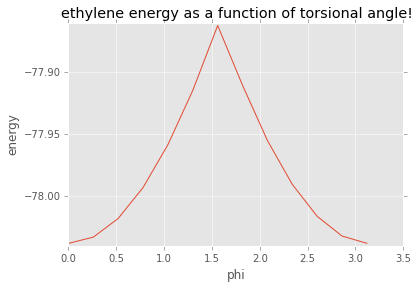

In [143]:
##########HOWEVER MANY LINES YOU NEED TO MAKE THE PLOT##########

plt.plot(angles_array,energy_array)
plt.xlabel('phi')
plt.ylabel('energy')
plt.title('ethylene energy as a function of torsional angle!')
plt.show()